# Week 3 - Training

Now that we have the shape of our general purpose curve fitting function, how do we train them?

## Outline

* What is training?
* Gradient descent
* Stochastic Gradient descent
* Train/test split 
* Train our first network with Keras

**Key Vocabulary**

* Loss Function
* 

In [2]:
# Imports in this lesson

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as K

from sklearn.model_selection import train_test_split

## What is Training

In the last lesson, we talked about the structure of neural networks as mathematical functions.
We learned that neural networks satisfy the universal approximation theorem, meaning that with a good choice of parameters they can approximate _any_ function.
This week, we will discuss _how_ we can find the best values for the weights and biases so that the neural network fits whatever data we like.
The process of finding the best parameters is called **training.**

## Gradient Descent

In Lesson 1, we introduced the idea of gradient descent. Let's review the algorithm here:

1. Randomly initialize the weights or the network.
2. Compute the loss (e.g. mean square error)
3. Compute the gradient of loss with respect to the weights.
4. Update the weights by subtracting a small multiple of the gradient.
5. Repeat steps 2-4 either a set number of times, or until convergence.

Here "convergence" means that the change in the weights is sufficiently small.

### The Loss Function

The loss function is a function that has the property that the smaller its output, the better our neural network performs on its desired task.
For example, when doing a regression problem where we want our network to predict a continuous value, the mean square error is a typical choice for loss function.
Traditionally, the letter $J$ is used for the loss function.

$$J(\vec{w}) = \frac{1}{2N}\sum_{i=1}^N |y_i - f(\vec{x}_i; \vec{w})|^2$$

Symbol | Description
-------|------------
$J$ | The loss function
$\vec{w}$ | The current network weights
$N$ | The total number of training samples
$f$ | The neural network function
$y_i$ | The target value for sample $i$
$\vec{x}_i$ | The input features for sample $i$

The $\frac{1}{2N}$ is a normalization term.

> **Note:**
>
> A common mistake is to confuse the loss function $J$ with the neural network function $f$.
> The loss function is a function of the network's _weights_, not a function of the training data $X$.

Notice that the function $J$ is a sum over all the training data.

## Training a Neural Network with Keras

The nice thing about using Tensorflow and Keras (or other frameworks such as Pytorch) for neural networks is that we can take advantage of _automatic differentiation_.
In other words, Tensorflow calculates the gradients for us! Let's take a look at the basic neural network from the last lesson and try to train it using gradient descent.

In [3]:
model = K.Sequential()

model.add(K.layers.Input((1, ), name='input_layer'))
model.add(K.layers.Dense(3, activation='relu', name='hidden_layer'))
model.add(K.layers.Dense(1, activation='linear', name='output_layer'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

Unlike the network last week, we used the _sigmoid_ function as our activation function instead of the step function.
This is because the step function does not work with gradient descent since it does not have a defined derivative at it's point of discontunity.
The sigmoid serves as a good smooth approximation of the step function, so we will use that instead.

In [4]:
model.compile(loss='mse', optimizer='sgd')

In [5]:
# Training the network using some data

X = np.linspace(-np.pi, np.pi, 100)
y = np.sin(X) + np.random.normal(0, 0.05, size=100)

X = X

X = X.reshape(-1, 1) ## Required to make X a matrix

model.fit(X, y, epochs=10**3, verbose=0)

I0000 00:00:1742334720.624084    1601 service.cc:146] XLA service 0x7fe760004b30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742334720.624128    1601 service.cc:154]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
I0000 00:00:1742334720.624134    1601 service.cc:154]   StreamExecutor device (1): Quadro RTX 5000, Compute Capability 7.5
I0000 00:00:1742334721.041888    1601 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


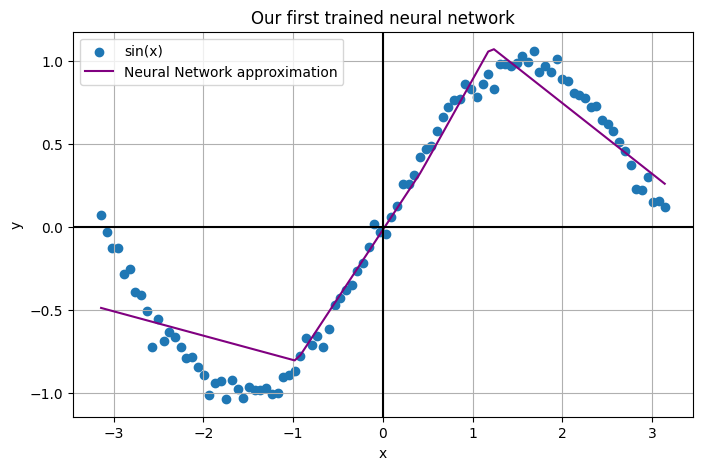

In [6]:
# Compare the model with the actual function:

y_hat = model.predict(X)


plt.figure(figsize=(8, 5))

plt.scatter(X, y, label='sin(x)')
plt.plot(X, y_hat, label='Neural Network approximation', c='purple')

plt.title("Our first trained neural network")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(c='k')
plt.axvline(c='k')
plt.grid()
plt.legend()

Not very good at all! Let's improve things by increasing the number of neurons in our hidden layer.

Training model size 3...
Training model size 10...
Training model size 50...
Training model size 100...


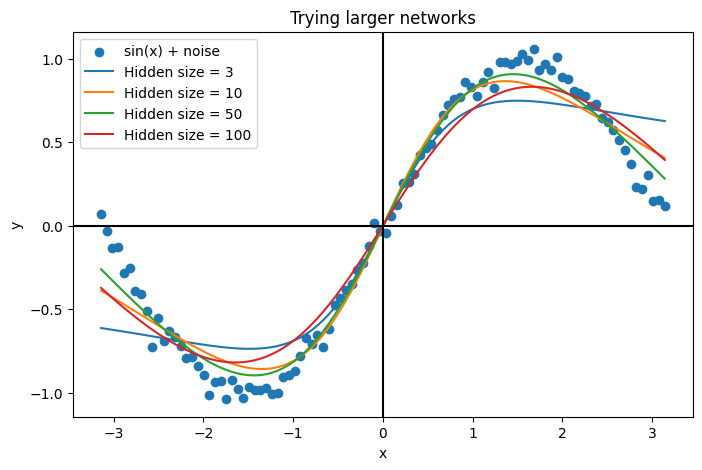

In [7]:
plt.figure(figsize=(8, 5))

plt.scatter(X, y, label='sin(x) + noise')


for hidden_size in [3, 10, 50, 100]:
    print(f"Training model size {hidden_size}...")
    model = K.Sequential()
    
    model.add(K.layers.Input((1, ), name='input_layer'))
    model.add(K.layers.Dense(hidden_size, activation='tanh', name='hidden_layer'))
    model.add(K.layers.Dense(1, activation='linear', name='output_layer'))

    model.compile(loss='mse', optimizer='sgd')

    # Don't show output for every training...
    model.fit(X, y, epochs=100, batch_size=10, verbose=0)

    y_hat = model.predict(X, verbose=0)
    
    plt.plot(X, y_hat, label=f'Hidden size = {hidden_size}')


plt.title("Trying larger networks")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(c='k')
plt.axvline(c='k')
plt.legend()

## Stochastic Gradient Descent

When training neural networks on our computers, we have to take avaliable memory (RAM) into account.
For this reason, we almost always use a variation of gradient descent, called _stochastic gradient descent_.
We talked about SDG in Lesson 1, but we can now look at it in practice.

The main difference is that SGD does not calculate the loss function across the entire training data all at once.
Instead, we break the training data into several smaller _mini batches_ and perform the weight update with respect to each mini batch.
The full algorithm is outlined below:

1. Shuffle the training data
2. Separate the training data into mini-batches of fixed size
3. For each mini batch, perform the GD update (Steps 2-4 in the GD algorithm)
4. Repeat steps 1-3 until convergence

One entire pass through the training data is called an _epoch_.

You may have noticed above the `batch_size` argument in the model's `fit` function.
This is how you tell Keras what your mini batch size will be.

Stochastic gradient descent is so common place, that typically this is what people actually mean when they refer to "gradient descent."

## Evaluating Your Model

### Creating a Testing Set

Because neural networks are general-purpose functions, they are highly susceptible to the problem of _overfitting_ to their training data.
This can mean that the model has simply memorized its training data, rather than learning the general relationship between the input features and the target.

> **Definitions**
>
> A model is **overfit** if it performs very well on its training data, but does not generalize well to new data. Also called "high variance".
>
> A model is **underfit** if it performs equally poorly on both its training data and new data. Also called "high bias".

<img src="../images/Overfitting.svg.png" alt="Overfitting" width="300" height="auto"><img src="../images/Pyplot_overfitting.png" alt="Overfitting" width="300" height="auto">

> **Image sources:**
>
> Chabacano - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=3610704
> 
> ThirdOrderLogic - Own work, CC BY 4.0, https://commons.wikimedia.org/w/index.php?curid=150012280

In order to combat this problem we need a way to test how well the model performs on data it did not train on.
A simple and common way to accomplish this is to set aside some of your training data as a testing set. 

![Train and Test Sets](../images/train_test.png)

> This image represents how we perform train/test splitting.
> The hope is that "your data" is a good representitive sample of all data your model will ever be required to make predictions on.

A typical test set size is 10-20% of your avaliable data, but it will depend on the specifics of your situation including how much data you have and how expensive it is to gather more.

We can use the `sklearn` `train_test_split` function to assist us with creating our test set.

In [8]:
# Load some data
df = pd.read_csv('../data/basic_data.csv')

df.head()

,x1,x2,y
0,0.411954,0.132374,-0.837303
1,0.555589,0.389191,-0.221846
2,0.126267,0.597047,-1.648427
3,0.167215,0.390355,-1.513091
4,0.320619,0.868072,-0.521532


In [9]:
# Get the X feature matrix and y target vector
X = df[['x1', 'x2']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

### Learning Curves

In traditional machine learning, you can use learning curves to check to see if your model is over or under fitting.
These curves are created by repeatably training your model on larger and larger training sets and checking the performance on the training and testing sets.

<img src="../images/learning_curves.png" alt="Learning Curves" width="500" height="auto">

This process can be somewhat time intensive since we are required to retrain the model many many times.
Whe working with neural networks, however, we do not need to retrain the model many times.
Instead, we can keep track of the performance metrics we care about at the end of each epoch.

Keras lets us do this very easily. When you call the `fit` function of a model, it will return a `History` object which we can use to plot the model's learning curves.

In [10]:
# Make a simple model
model = K.Sequential()

model.add(K.layers.Input((2, ), name='input_layer'))
model.add(K.layers.Dense(10, activation='relu', name='hidden_layer'))
model.add(K.layers.Dense(1, activation='linear', name='output_layer'))

# We want to evaluate the model w/r/t the r^2 score
model.compile(loss='mse', metrics=[K.metrics.R2Score()])

# Train on the training data, and evaluate on the testing data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=0)

<Axes: >

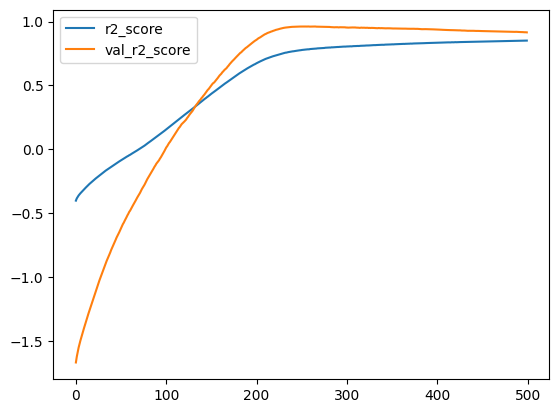

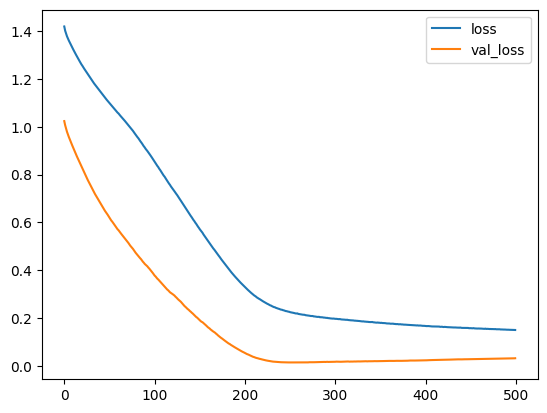

In [11]:
# It can be convienient to put the history into a dataframe
history_df = pd.DataFrame(history.history)

history_df[['r2_score', 'val_r2_score']].plot()
history_df[['loss', 'val_loss']].plot()

In [12]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

X, y = load_wine(as_frame=True, return_X_y=True)

X_ = StandardScaler().fit_transform(X)

X_scaled = pd.DataFrame(X_, columns=X.columns)
X_scaled['alcohol'] = X['alcohol']

X_scaled.to_csv("../data/wine_preprocessed.csv", index=False)

# Homework Questions

1. Describe the difference between standard gradient descent and stochastic gradient descent.
Explain the advantages of using stochastic gradient descent.

2. Explain what the purpose of a loss function is. Describe two loss functions we learned about and what the use cases would be for each.

3. Use the Pandas library's `read_csv` function  to load the wine dataset. Use the `train_test_split` function to split the data into training and testing datasets with 80% for training and 20% for testing. Treat the `alcohol` column as the target.

(Note, this dataset comes from `sklearn.datasets.load_wine`, but has been pre-processed for you.)

4. Use the Keras library's `Sequential` model to build a simple neural network with one hidden layer with 100 neurons. Train the model to predict the column `alcohol`. Evaluate the neural network on the test data you created in question 2.

5. Use learning curves to determine if the neural network from question \#4 is underfitting or overfitting. Explain your reasoning.

6. Try to improve the neural network you trained in question \#4 above by including regularization, dropout, or by varying the number or size of layers.